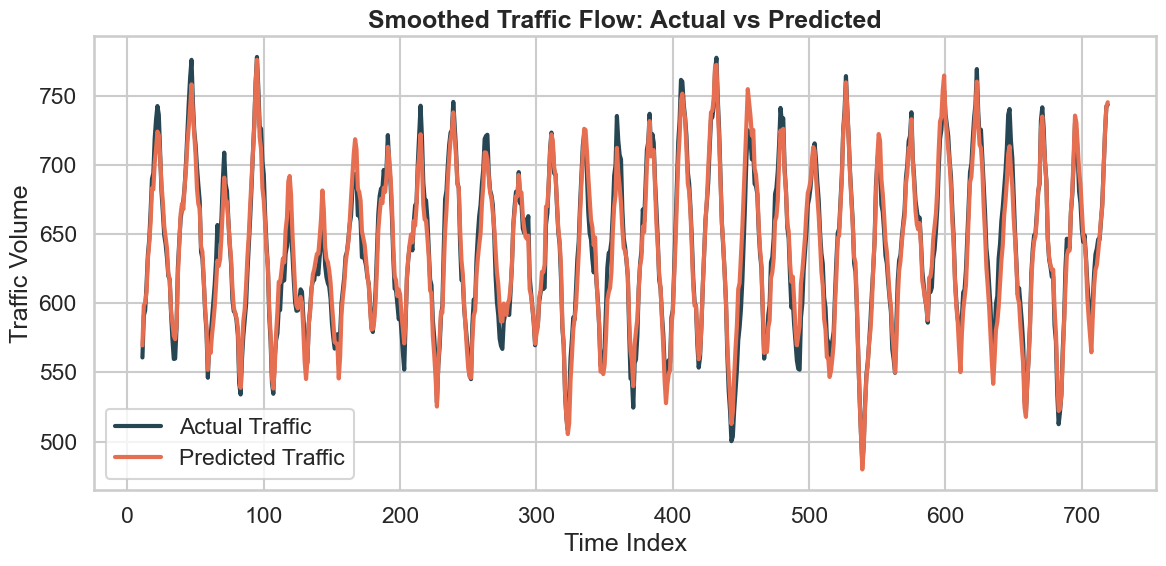

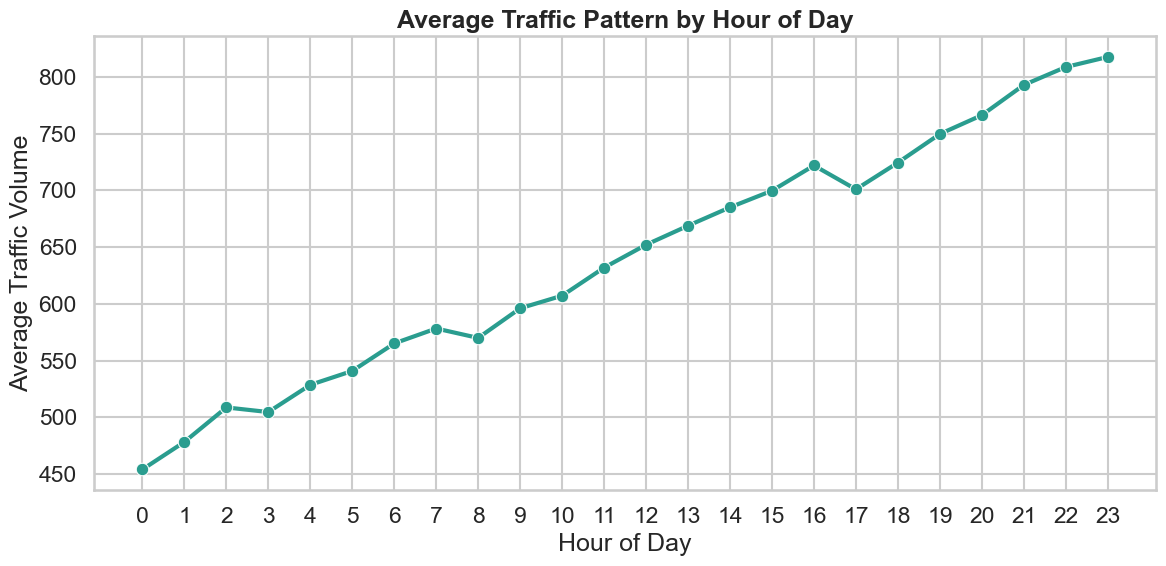

C:\Users\rajva\AppData\Local\Temp\ipykernel_9100\3104399899.py:102: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


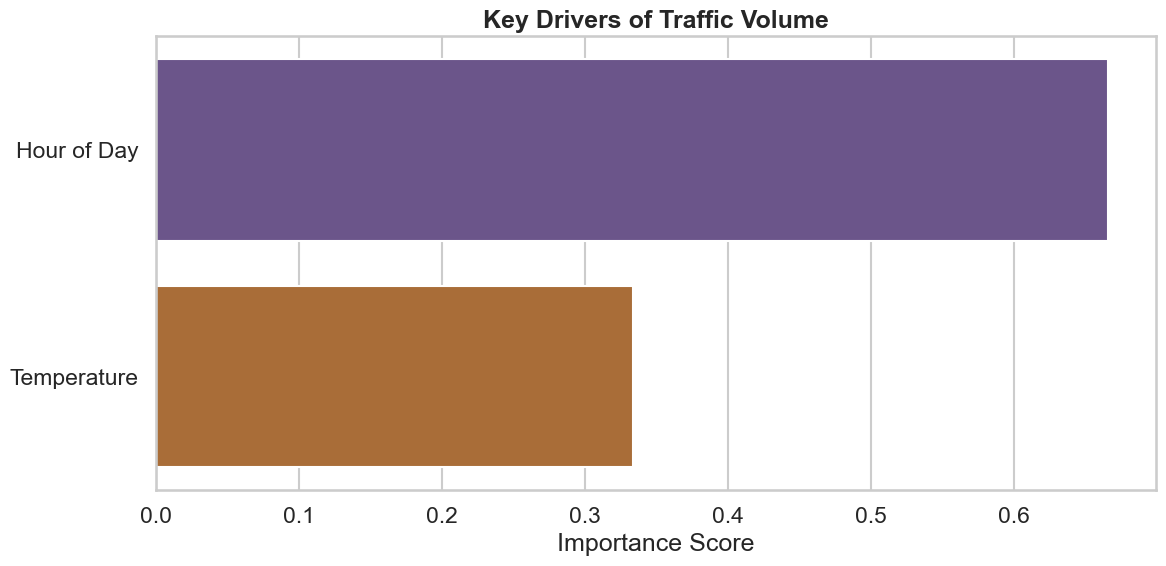

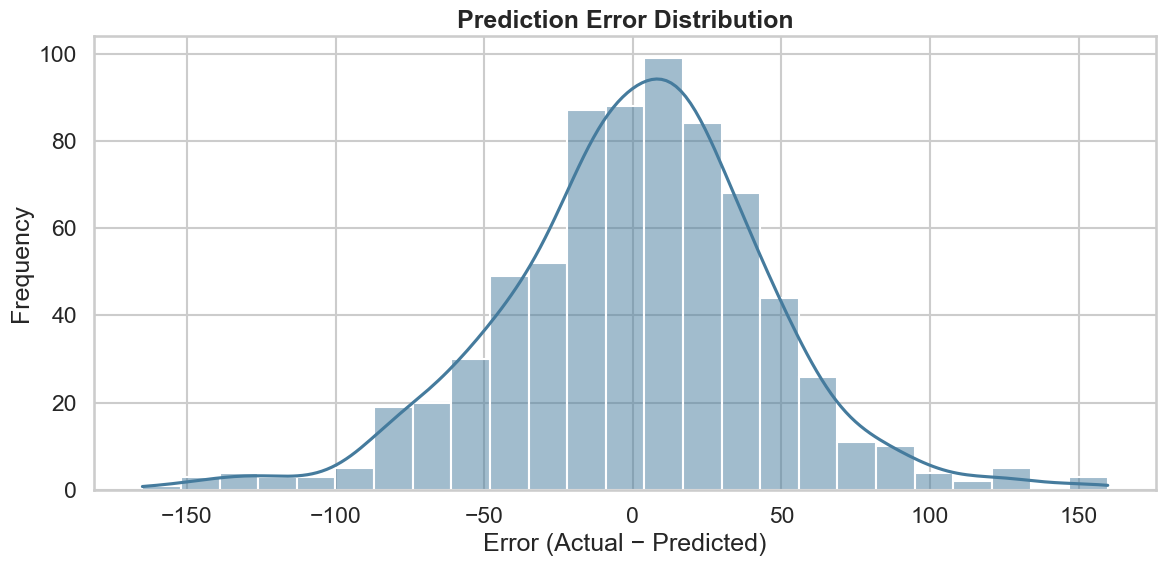

Predicted Traffic Volume: 745


c:\Users\rajva\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

sns.set_theme(
    style="whitegrid",
    context="talk"
)

plt.rcParams["figure.figsize"] = (12, 6)
plt.rcParams["axes.titleweight"] = "bold"

np.random.seed(42)

hours = np.tile(np.arange(0, 24), 30)   
days = np.repeat(np.arange(1, 31), 24)
temperature = np.random.randint(15, 40, size=len(hours))

traffic_volume = (
    200
    + 15 * hours
    + 10 * temperature
    + np.random.normal(0, 50, size=len(hours))
)

df = pd.DataFrame({
    "day": days,
    "hour": hours,
    "temperature": temperature,
    "traffic_volume": traffic_volume.astype(int)
})

df.to_csv("traffic_data.csv", index=False)

x= df[["hour", "temperature"]]
y = df["traffic_volume"]

x_train,x_test,y_train,y_yest=train_test_split(x,y,test_size=0.3,random_state=42)
model=RandomForestRegressor(
    n_estimators=200,
    max_depth=8,
    random_state=42
)

model.fit(x_train,y_train)
df["predicted_traffic"] = model.predict(x)

df["actual_smooth"] = df["traffic_volume"].rolling(12).mean()
df["predicted_smooth"] = df["predicted_traffic"].rolling(12).mean()

plt.figure()
sns.lineplot(
    x=df.index,
    y=df["actual_smooth"],
    label="Actual Traffic",
    linewidth=3,
    color="#264653"
)
sns.lineplot(
    x=df.index,
    y=df["predicted_smooth"],
    label="Predicted Traffic",
    linewidth=3,
    color="#e76f51"
)

plt.title("Smoothed Traffic Flow: Actual vs Predicted")
plt.xlabel("Time Index")
plt.ylabel("Traffic Volume")
plt.legend()
plt.tight_layout()
plt.show()

hourly_avg = df.groupby("hour", as_index=False)["traffic_volume"].mean()

plt.figure()
sns.lineplot(
    data=hourly_avg,
    x="hour",
    y="traffic_volume",
    marker="o",
    linewidth=3,
    color="#2a9d8f"
)

plt.title("Average Traffic Pattern by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Average Traffic Volume")
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

importance_df = pd.DataFrame({
    "Feature": ["Hour of Day", "Temperature"],
    "Importance": model.feature_importances_
})

plt.figure()
sns.barplot(
    data=importance_df,
    x="Importance",
    y="Feature",
    palette=["#6a4c93", "#bc6c25"]
)

plt.title("Key Drivers of Traffic Volume")
plt.xlabel("Importance Score")
plt.ylabel("")
plt.tight_layout()
plt.show()

errors = y - df["predicted_traffic"]

plt.figure()
sns.histplot(
    errors,
    bins=25,
    kde=True,
    color="#457b9d"
)

plt.title("Prediction Error Distribution")
plt.xlabel("Error (Actual − Predicted)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

hour_input = int(input("Enter hour (0–23): "))
temp_input = float(input("Enter temperature (°C): "))

prediction = model.predict([[hour_input, temp_input]])
print(f"Predicted Traffic Volume: {int(prediction[0])}")